In [126]:
import matplotlib
import numpy as np
import os
import pickle
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from glob import glob
from pprint import pprint
from astropy.visualization import make_lupton_rgb
from tqdm import tqdm
from hydra import initialize, compose

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

In [127]:
data_dir = os.path.join(config.machine.data_dir, 'STIPS_2')
final_image_dir = os.path.join(config.machine.data_dir, 'STIPS_final')
# final_image_dir = os.path.join(config.machine.data_dir, 'STIPS_2')

In [128]:
files = sorted(glob(f'{data_dir}/*.fits'))
pprint(files)

['/data/bwedig/mejiro/STIPS_2/filtered_catalog_00_conv_F106.fits',
 '/data/bwedig/mejiro/STIPS_2/filtered_catalog_00_conv_F106_observed_SCA01.fits',
 '/data/bwedig/mejiro/STIPS_2/filtered_catalog_00_conv_F129.fits',
 '/data/bwedig/mejiro/STIPS_2/filtered_catalog_00_conv_F129_observed_SCA01.fits',
 '/data/bwedig/mejiro/STIPS_2/filtered_catalog_00_conv_F184.fits',
 '/data/bwedig/mejiro/STIPS_2/filtered_catalog_00_conv_F184_observed_SCA01.fits',
 '/data/bwedig/mejiro/STIPS_2/filtered_catalog_01_conv_F106.fits',
 '/data/bwedig/mejiro/STIPS_2/filtered_catalog_01_conv_F106_observed_SCA01.fits',
 '/data/bwedig/mejiro/STIPS_2/filtered_catalog_01_conv_F129.fits',
 '/data/bwedig/mejiro/STIPS_2/filtered_catalog_01_conv_F129_observed_SCA01.fits',
 '/data/bwedig/mejiro/STIPS_2/filtered_catalog_01_conv_F184.fits',
 '/data/bwedig/mejiro/STIPS_2/filtered_catalog_01_conv_F184_observed_SCA01.fits',
 '/data/bwedig/mejiro/STIPS_2/filtered_catalog_02_conv_F106.fits',
 '/data/bwedig/mejiro/STIPS_2/filtered_

In [129]:
from astropy.io import fits
from astropy.table import Table

file_path = '/data/bwedig/mejiro/STIPS/hlwas_sim_15_gals_000.fits'
hdul = fits.open(file_path)
hdul.info()

table_data = Table(hdul[1].data)
table_data.show_in_notebook()

Filename: /data/bwedig/mejiro/STIPS/hlwas_sim_15_gals_000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     56   1000R x 12C   [K, D, D, D, 1A, 4A, 7A, D, D, D, D, D]   


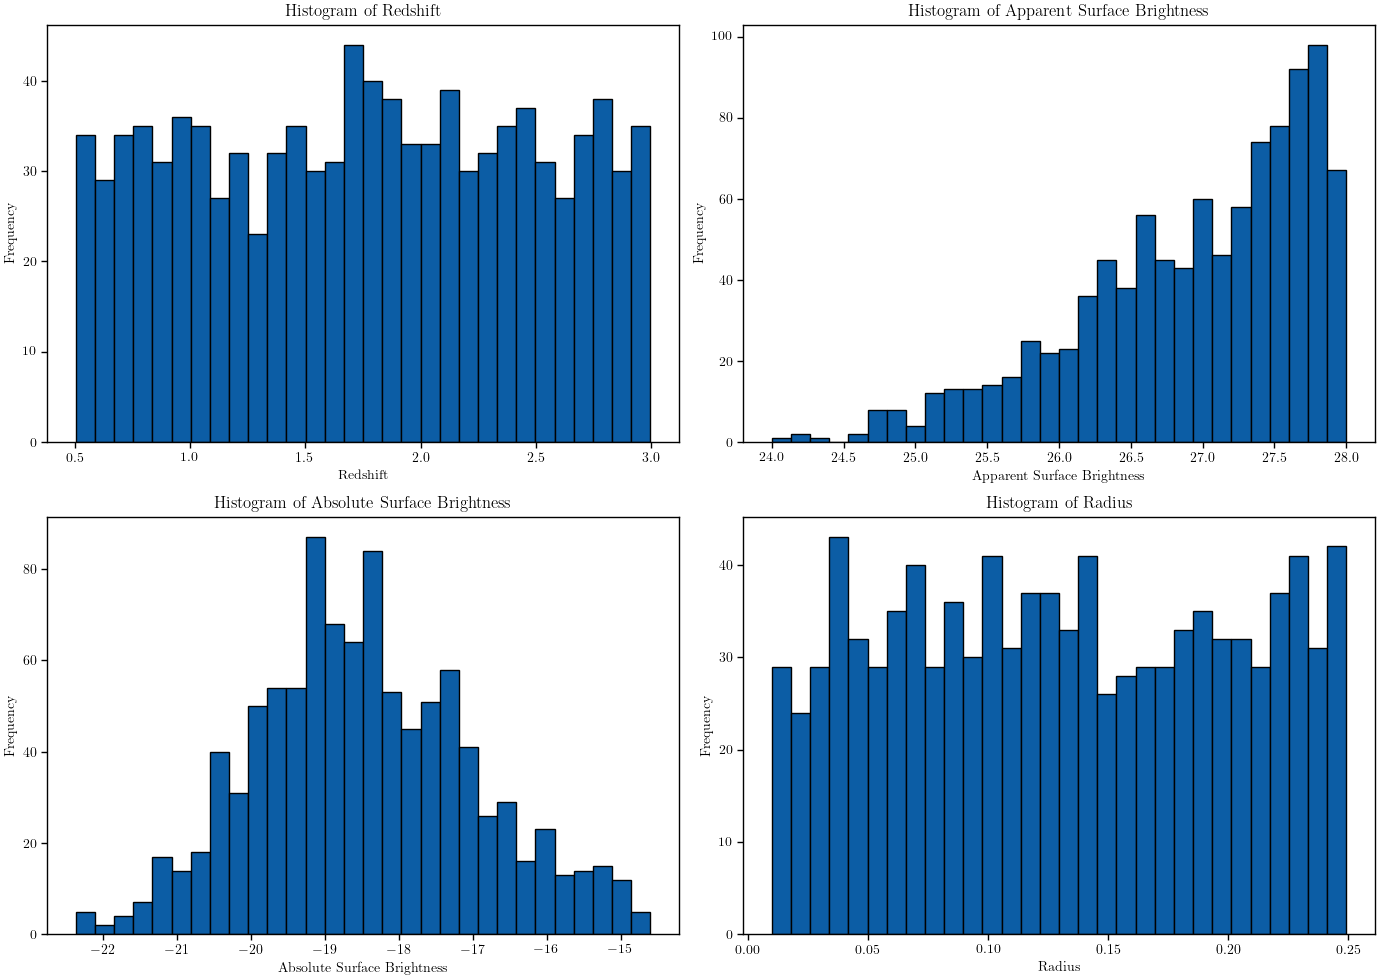

In [130]:
# Extract the 'absolute_surface_brightness' and 'radius' columns from table_data
absolute_surface_brightness = table_data['absolute_surface_brightness']
apparent_surface_brightness = table_data['apparent_surface_brightness']
radius = table_data['radius']
redshift = table_data['redshift']

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot the histogram of redshift
axs[0, 0].hist(redshift, bins=30, edgecolor='black')
axs[0, 0].set_xlabel('Redshift')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Histogram of Redshift')

# Plot the histogram of apparent_surface_brightness
axs[0, 1].hist(apparent_surface_brightness, bins=30, edgecolor='black')
axs[0, 1].set_xlabel('Apparent Surface Brightness')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Histogram of Apparent Surface Brightness')

# Plot the histogram of absolute_surface_brightness
axs[1, 0].hist(absolute_surface_brightness, bins=30, edgecolor='black')
axs[1, 0].set_xlabel('Absolute Surface Brightness')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Histogram of Absolute Surface Brightness')

# Plot the histogram of radius
axs[1, 1].hist(radius, bins=30, edgecolor='black')
axs[1, 1].set_xlabel('Radius')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Histogram of Radius')

# Adjust layout
plt.tight_layout()
plt.show()

In [131]:
# file_path = '/grad/bwedig/mejiro/paper/supplemental/full_catalog.fits'
# hdul = fits.open(file_path)
# hdul.info()

# table_data = Table(hdul[1].data)
# table_data.show_in_notebook()

In [132]:
# # Extract the 'F129' column from table_data
# f129_data = table_data['F129']

# # Plot the histogram
# plt.figure(figsize=(10, 6))
# plt.hist(f129_data, bins=30, edgecolor='black')
# plt.xlabel('F129')
# plt.ylabel('Frequency')
# plt.title('Histogram of F129')
# plt.show()

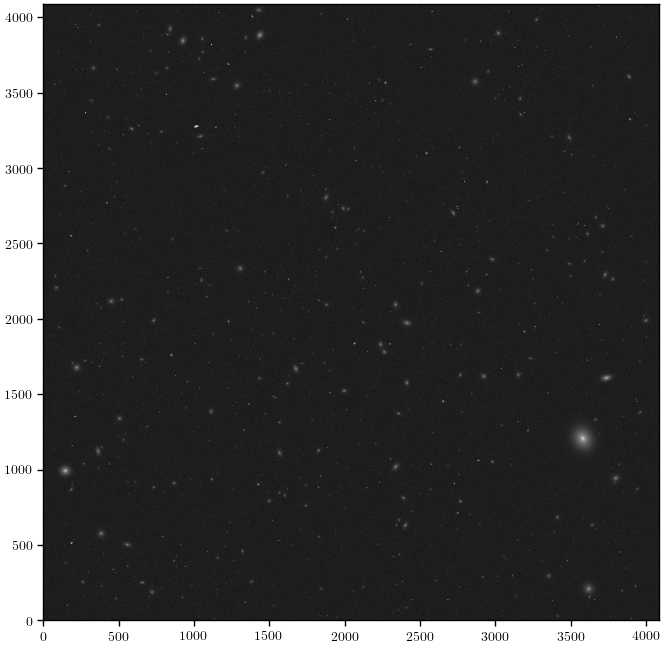

In [133]:
images_f129 = [np.load(f) for f in sorted(glob(os.path.join(final_image_dir, 'hlwas_sim_F129_*.npy')))]

plt.figure(figsize=(8, 8))
plt.imshow(np.log10(images_f129[8]), origin='lower', cmap='gray')
# plt.imshow(images_f106[0], origin='lower')
plt.show()

In [134]:
images_f106 = [np.load(f) for f in sorted(glob(os.path.join(final_image_dir, 'hlwas_sim_F106_*.npy')))]
images_f129 = [np.load(f) for f in sorted(glob(os.path.join(final_image_dir, 'hlwas_sim_F129_*.npy')))]
images_f184 = [np.load(f) for f in sorted(glob(os.path.join(final_image_dir, 'hlwas_sim_F184_*.npy')))]

print(len(images_f106), len(images_f129), len(images_f184))

18 18 18


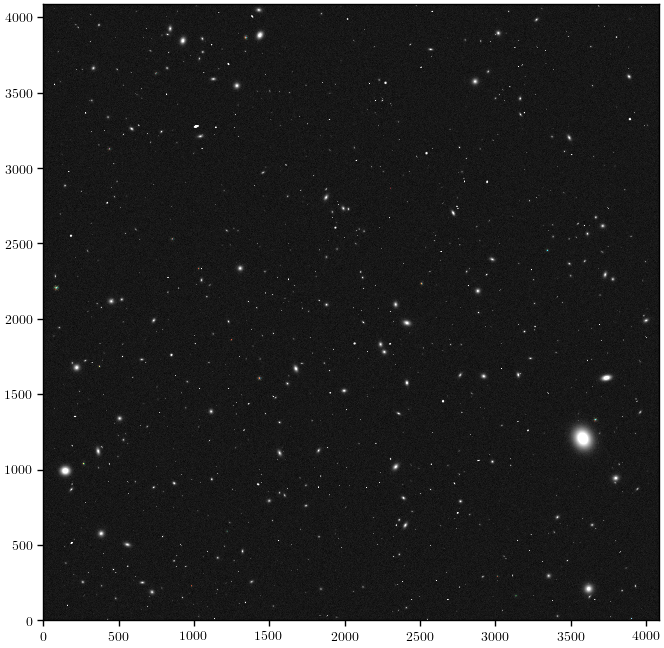

In [143]:
idx = 8
f106 = images_f106[idx]
f129 = images_f129[idx]
f184 = images_f184[idx]
# min = np.percentile([f106, f129, f184], 5)
min = np.min([f106, f129, f184])
rgb = make_lupton_rgb(f184, f129, f106, minimum=min, stretch=1.5, Q=6)

plt.figure(figsize=(8, 8))
# plt.imshow(np.log10(images_f106[0]), origin='lower')
plt.imshow(rgb, origin='lower')
plt.show()

In [144]:
rgb_images = []
for i in tqdm(range(len(images_f106))):  # 
    f106 = images_f106[i]
    f129 = images_f129[i]
    f184 = images_f184[i]
    # min = np.percentile([f106, f129, f184], 5)
    min = np.min([f106, f129, f184])
    rgb = make_lupton_rgb(f184, f129, f106, minimum=min, stretch=1.5, Q=6)
    rgb_images.append(rgb)



100%|██████████| 18/18 [00:37<00:00,  2.09s/it]


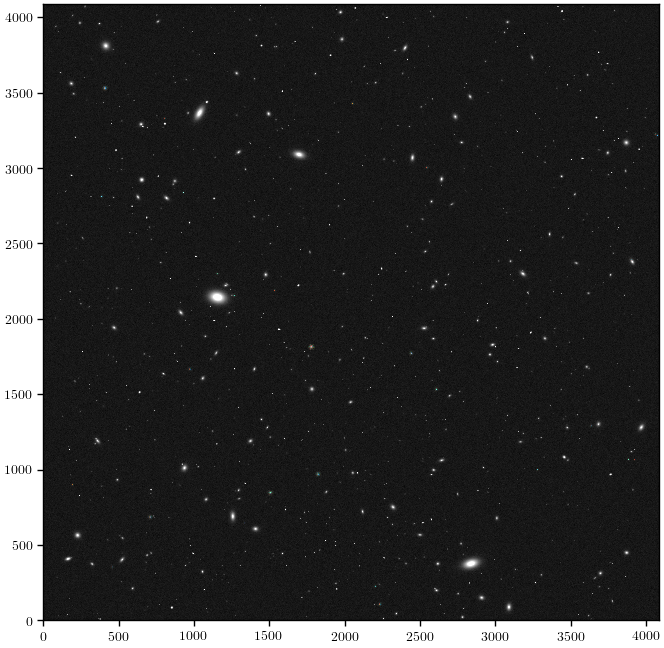

In [145]:
plt.figure(figsize=(8, 8))
# plt.imshow(np.log10(images_f106[0]), origin='lower')
plt.imshow(rgb_images[16], origin='lower')
plt.show()

In [146]:
data_array = np.array([np.log10(i) for i in images_f129])
data_array.shape

(18, 4088, 4088)

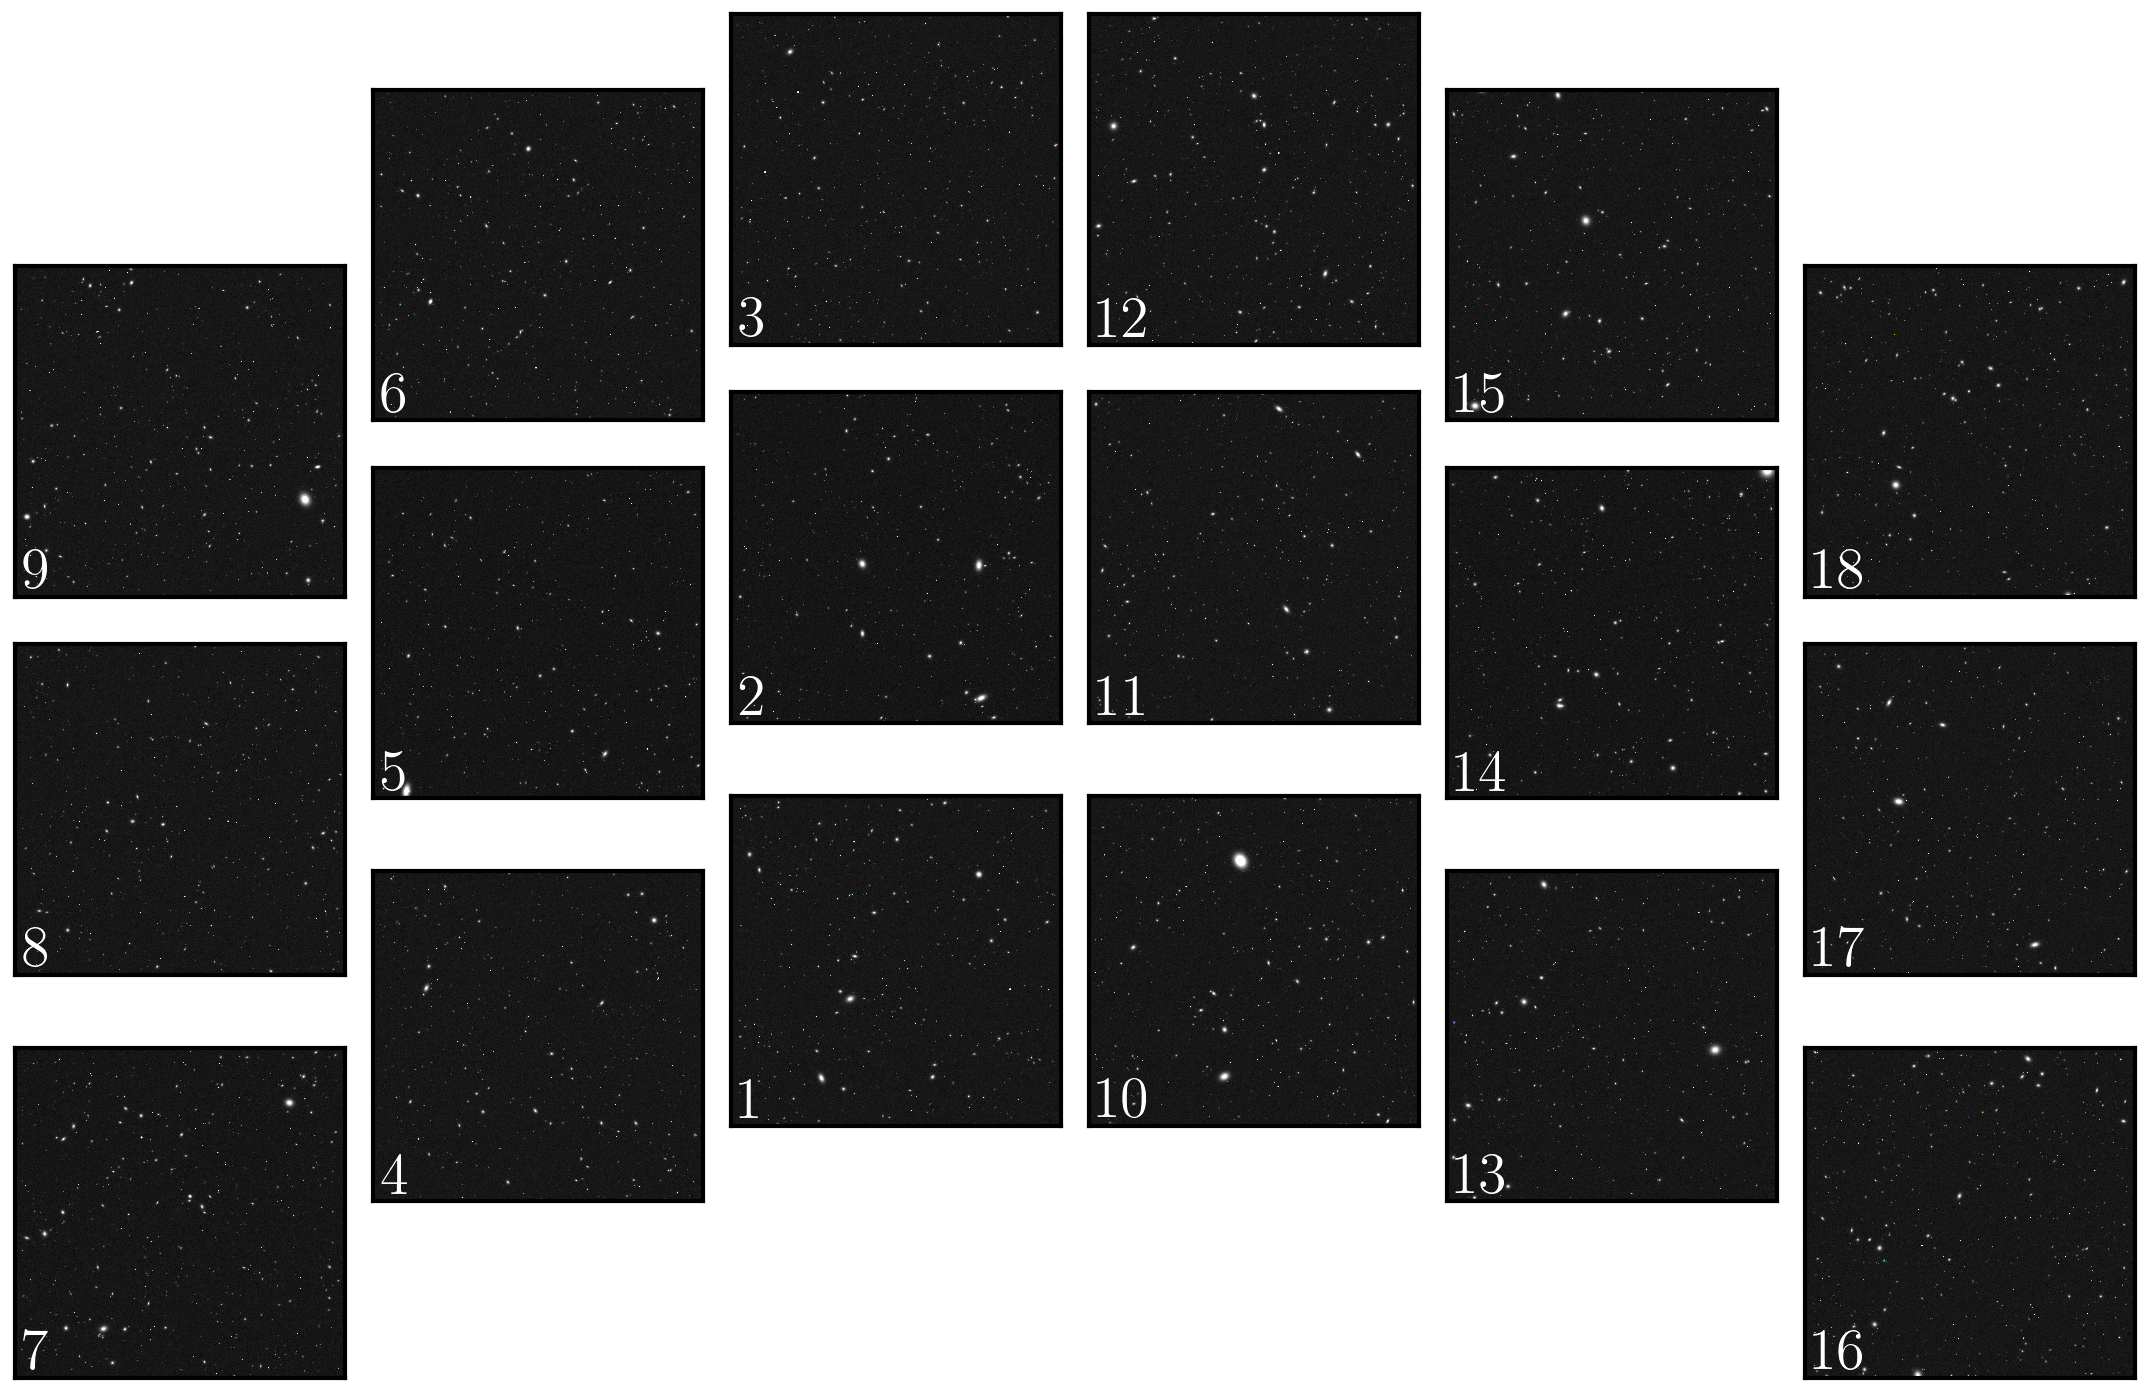

In [148]:
show_sca_id = True
savefig = True
savepath = os.path.join(repo_dir, 'paper', 'graphics', 'hlwas_bkg.png')
clabel = None
title = None

detector = plt.figure(figsize=(10, 6), dpi=300)
nrows, ncols = 55, 91
grid = detector.add_gridspec(nrows=nrows, ncols=ncols, figure=detector,
                             width_ratios=[1] * ncols, height_ratios=[1] * nrows,
                             hspace=0, wspace=0.1)
row_begins = np.array([10, 3, 0, 0, 3, 10])
row_ends = np.array([x + 14 for x in row_begins])
col_begins = np.arange(0, ncols, 14)
col_ends = np.array([x + 14 for x in col_begins])
add_distance = [15, 16, 16]

axs = []
for row in add_distance:
    for i in range(len(row_begins)):
        ax = detector.add_subplot(grid[row_begins[i]:row_ends[i], col_begins[i] + 1:col_ends[i]])
        ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
        axs.append(ax)

    row_begins += row
    row_ends += row

# Argument data_array should be an array of len(N SCAs) containing arrays:
# data_array = np.array([np.random.rand(14,14)]*len(axs))  # TODO this is fake data
# data_array = np.array(np.log10(images))  # rgb_images
data_array = np.array(rgb_images)
vmin = np.nanmin(data_array.ravel())
vmax = np.nanmax(data_array.ravel())

# sortidx = sca_order.argsort()
# sca_order = sca_order[sortidx]
# data_array = data_array[sortidx]
imsim_sca_order = np.array([9, 6, 3, 12, 15, 18, 8, 5, 2, 11, 14, 17, 7, 4, 1, 10, 13, 16]) - 1

for i, sca in enumerate(imsim_sca_order):
    try:
        im = axs[i].imshow(data_array[sca])  # , cmap='plasma', vmin=vmin,vmax=vmax
    except:
        im = axs[i].imshow(np.zeros((4088, 4088)))

    if show_sca_id:
        axs[i].annotate(sca + 1, xy=(100, 100), fontsize=14, color='white')

# cbar_ax = detector.add_subplot(grid[:,-4:-1])
# cbar = plt.colorbar(im, cax=cbar_ax)
# if clabel is not None:
#     cbar.set_label(clabel, labelpad=20, fontsize=18, rotation=270)
if title is not None:
    plt.suptitle(title, y=0.93, fontsize=18)
if savefig:
    plt.savefig(savepath, dpi=300, bbox_inches='tight')

plt.show()